# Wow, such empty

## Imports yeah

In [ ]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generator lol

In [24]:
# Constants
volume_HCl = 0.05  # Volume of HCl in l
NaOH_concentration = 0.2  # Molar concentration of NaOH
volumes_added = np.linspace(0, 0.3, 1000)  # Volume of NaOH added in mL (0 to 100 ml)

# Directory to store generated files
output_dir = "titration_datasets"
os.makedirs(output_dir, exist_ok=True)

# Function to calculate pH
def calculate_pH(HCl_conc, NaOH_conc, V_HCl, V_NaOH_added):
    # Moles of HCl initially
    moles_HCl = HCl_conc * V_HCl  # in moles
    
    # Moles of NaOH added
    moles_NaOH = NaOH_conc * V_NaOH_added  # in moles

    # Before equivalence point: excess H+
    if moles_NaOH < moles_HCl:
        moles_H_remaining = moles_HCl - moles_NaOH
        concentration_H = moles_H_remaining / (V_HCl + V_NaOH_added)
        pH = -np.log10(concentration_H)
    
    # At equivalence point: pH = 7 (neutral solution)
    elif np.isclose(moles_NaOH, moles_HCl, atol=1e-5):
        pH = 7
    
    # After equivalence point: excess OH-
    else:
        moles_OH_excess = moles_NaOH - moles_HCl
        concentration_OH = moles_OH_excess / (V_HCl + V_NaOH_added)
        pOH = -np.log10(concentration_OH)
        pH = 14 - pOH

    return pH

# Generate titration curves for 100 datasets
for i in range(1, 101):
    # Randomize concentration of HCl for each titration between 0.05 M and 1.0 M
    HCl_concentration = np.random.uniform(0.05, 1.0)
    
    # Store pH values
    pH_values = []

    for V_NaOH in volumes_added:
        pH = calculate_pH(HCl_concentration, NaOH_concentration, volume_HCl, V_NaOH)
        pH_values.append(pH)
    
    # Create DataFrame
    df = pd.DataFrame({
        "Volume NaOH / l": volumes_added,
        "pH": pH_values
    })
    
    # Add some random noise to simulate real data (small fluctuations in pH)
    df["pH"] = df["pH"] + np.random.normal(0, 0.05, df["pH"].shape)
    
    # Save to CSV file
    df.to_csv(os.path.join(output_dir, f"titration_{i}.csv"), index=False)

print("Titration data generated successfully!")

Titration data generated successfully!


## Sexy data is sexy

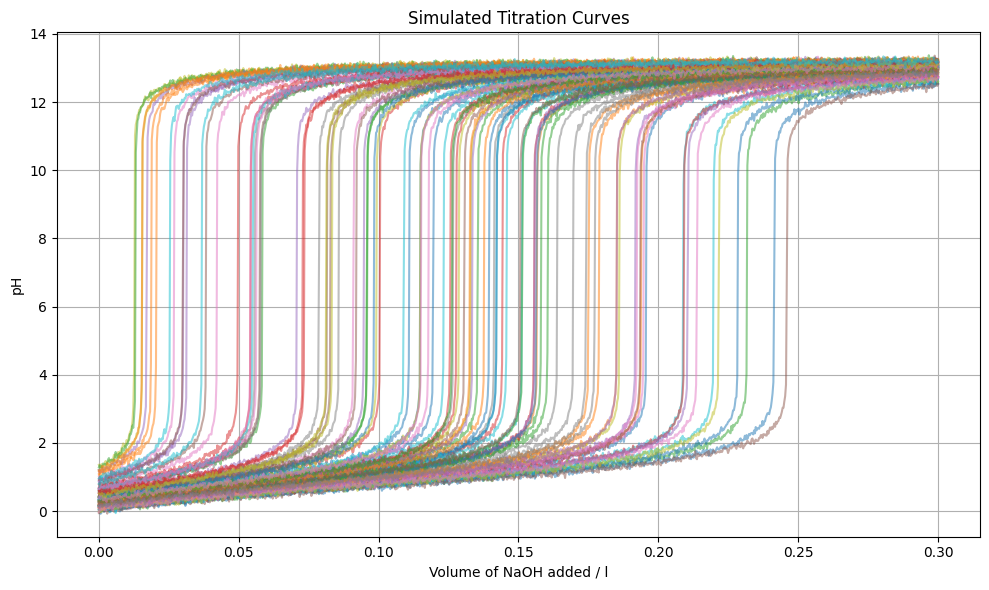

In [25]:
# Directory containing the titration datasets
data_dir = "titration_datasets"

# Initialize plot
plt.figure(figsize=(10, 6))

# Loop through the CSV files and plot each titration curve
for filename in os.listdir(data_dir):
    if filename.endswith(".csv"):
        filepath = os.path.join(data_dir, filename)
        df = pd.read_csv(filepath)
        
        # Plot titration curve
        plt.plot(df["Volume NaOH / l"], df["pH"], label=filename.split('_')[1], alpha=0.5)

# Add labels and title
plt.xlabel("Volume of NaOH added / l")
plt.ylabel("pH")
plt.title("Simulated Titration Curves")
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

/var/folders/wp/l9gzqd2d0_l1t60lv307d2s00000gn/T/ipykernel_12003/3372318525.py:59: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


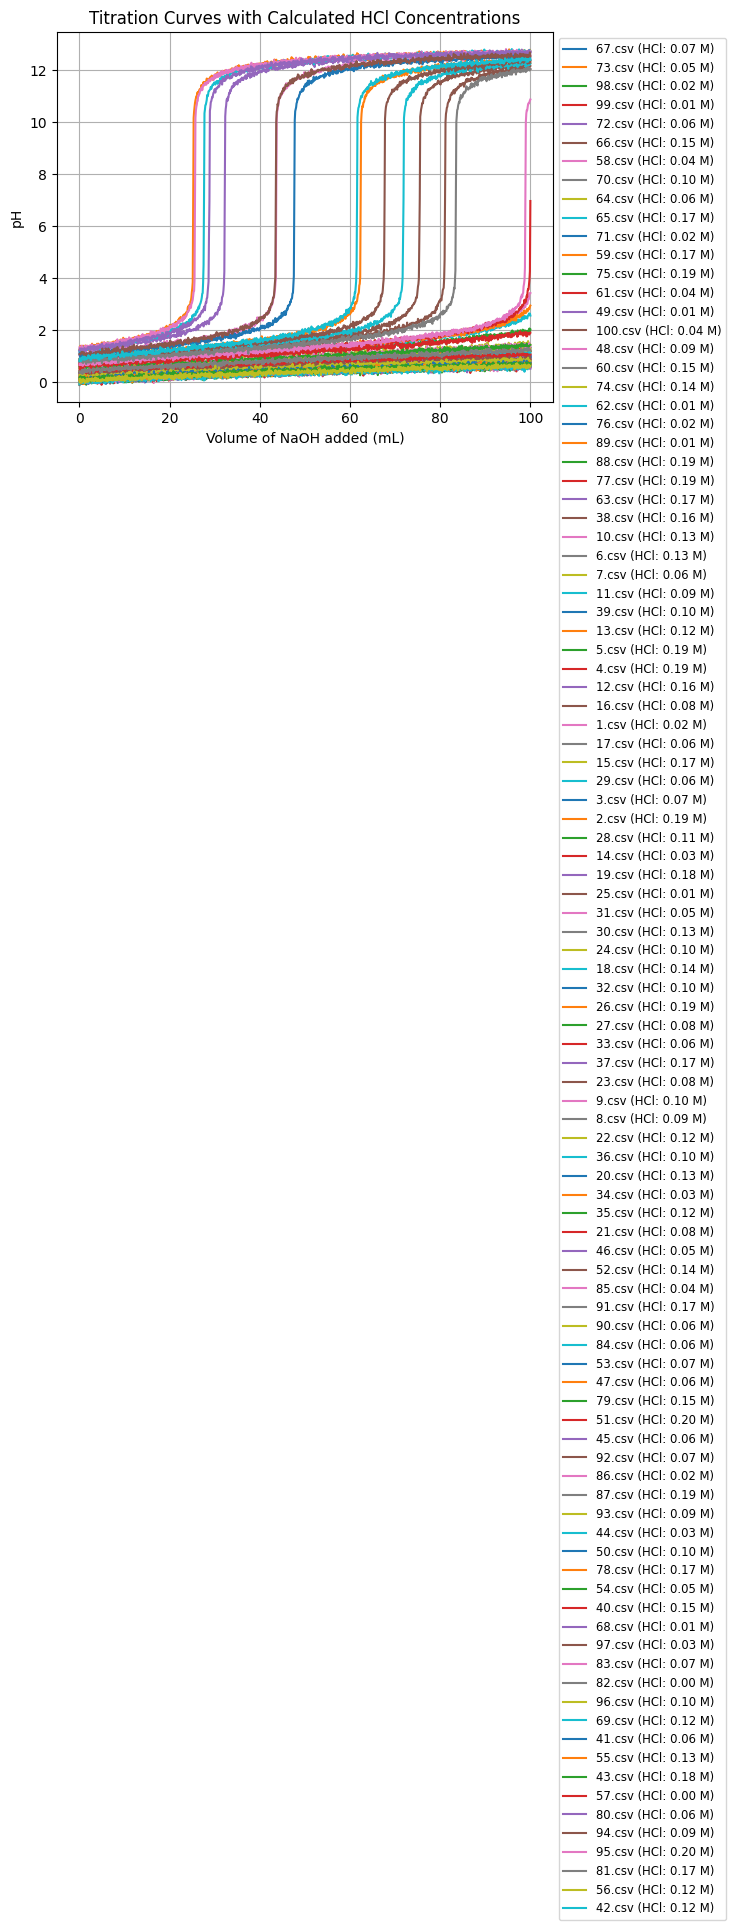

HCl concentrations calculated and saved to 'calculated_HCl_concentrations.csv'.


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Constants
NaOH_concentration = 0.1  # Molar concentration of NaOH (fixed)
volume_HCl = 50  # Volume of HCl in mL (known)

# Directory containing the titration datasets
data_dir = "titration_datasets"

# Function to find equivalence point based on maximum pH gradient (steepest slope)
def find_equivalence_point(df):
    # Calculate the difference in pH over the difference in volume (approximate derivative)
    dpH_dV = np.diff(df["pH"]) / np.diff(df["Volume NaOH (mL)"])
    
    # The equivalence point corresponds to the steepest change in pH, which is the max slope
    max_gradient_index = np.argmax(dpH_dV)
    
    # The corresponding volume of NaOH at the equivalence point
    V_eq = df["Volume NaOH (mL)"].iloc[max_gradient_index]
    
    return V_eq

# Initialize list to store results
results = []

# Loop through all titration files
for filename in os.listdir(data_dir):
    if filename.endswith(".csv"):
        filepath = os.path.join(data_dir, filename)
        
        # Load the titration data
        df = pd.read_csv(filepath)
        
        # Find equivalence point
        V_eq = find_equivalence_point(df)
        
        # Calculate the concentration of HCl using the formula
        HCl_concentration = (NaOH_concentration * V_eq) / volume_HCl
        
        # Append result to the list (filename and calculated concentration)
        results.append([filename, HCl_concentration])

        # Plot the titration curve for reference (optional)
        plt.plot(df["Volume NaOH (mL)"], df["pH"], label=f"{filename.split('_')[1]} (HCl: {HCl_concentration:.2f} M)")

# Save the results to a CSV
results_df = pd.DataFrame(results, columns=["Filename", "Calculated HCl Concentration (M)"])
results_df.to_csv("calculated_HCl_concentrations.csv", index=False)

# Show plot with calculated concentrations
plt.xlabel("Volume of NaOH added (mL)")
plt.ylabel("pH")
plt.title("Titration Curves with Calculated HCl Concentrations")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

print("HCl concentrations calculated and saved to 'calculated_HCl_concentrations.csv'.")

In [26]:
import os
import pandas as pd
import re

# Directory containing the titration datasets
data_dir = "titration_datasets"

# Function to extract the measurement number from the filename (e.g., "titration_1.csv" -> 1)
def get_measurement_number(filename):
    match = re.search(r'(\d+)', filename)
    return int(match.group(1)) if match else None

# Get all CSV filenames and sort them by the measurement number
filenames = [f for f in os.listdir(data_dir) if f.endswith(".csv")]
filenames_sorted = sorted(filenames, key=get_measurement_number)

# Initialize a DataFrame to hold the combined data
combined_df = pd.DataFrame()

# Loop through the sorted files and add them to the combined DataFrame
for filename in filenames_sorted:
    filepath = os.path.join(data_dir, filename)
    
    # Load the titration data
    df = pd.read_csv(filepath)
    
    # For the first file, initialize the combined_df with the volume of NaOH
    if combined_df.empty:
        combined_df["Volume NaOH / l"] = df["Volume NaOH / l"]
    
    # Extract the pH data and add it as a new column to combined_df
    combined_df[f"Titration {get_measurement_number(filename)}"] = df["pH"]

# Save the combined data to a single CSV file
combined_df.to_csv("data/titration_data.csv", index=False)

print("Titration data has been combined in measurement order and saved to 'combined_titration_data_by_measurement.csv'.")

Titration data has been combined in measurement order and saved to 'combined_titration_data_by_measurement.csv'.


/var/folders/wp/l9gzqd2d0_l1t60lv307d2s00000gn/T/ipykernel_12003/714962882.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df[f"Titration {get_measurement_number(filename)}"] = df["pH"]
